# =======================================
# IRIS DATASET EXPLORATORY DATA ANALYSIS
# =======================================

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


DATASET: 
Kaggle Iris Dataset

ABOUT: 
The Iris Dataset contains 150 measurements of three species of irises. Each flower has 4 measurements (length/width of sepals and petals). It is an ideal dataset for learning classification, because the setosa species is completely separable and the other two can be well distinguished by petal features.

QUESTIONS TO ANSWER:
1. Which features vary the most among species?
2. Are some features more correlated than others?

MAIN GOALS:
1. Work more with plots and graphs and try to understand them by making them


In [2]:
iris = pd.read_csv('iris_dataset.csv', index_col='Id')
sns.set_style("whitegrid")

### =============================================
### 2. DATA OVERVIEW
### =============================================

In [3]:
display(iris.head())
display(iris.dtypes)
display(iris.info())
display(iris.describe())
iris.shape

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


None

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


(150, 5)

- We look at the distribution of the target variable to see how balanced the classes are. 
- Based on output of code below we see we have well balanced dataset

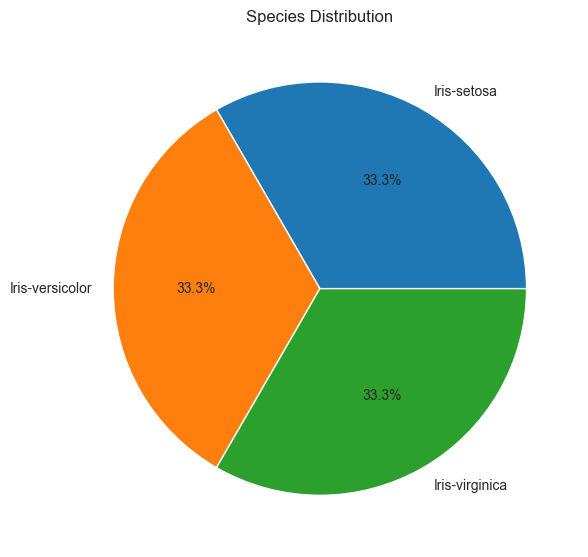

In [4]:
counts = iris['Species'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title("Species Distribution")
plt.tight_layout()
plt.savefig('plots/1_specie_distr.png', dpi=300, bbox_inches='tight')
plt.show()

### =============================================
### 3. Data Cleaning
### =============================================

In [5]:
display(iris.isnull().sum())
display(iris[iris.duplicated()])

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
35,4.9,3.1,1.5,0.1,Iris-setosa
38,4.9,3.1,1.5,0.1,Iris-setosa
143,5.8,2.7,5.1,1.9,Iris-virginica


- We see that we have no missing values and no important duplicates so we go on next step

### =============================================
### 4. EXPLORATORY DATA ANALYSIS
### =============================================

### 4.1 Univariate Analysis
Univariate analysis is the examination of a single variable to understand its distribution, central tendency, spread, and potential outliers, without considering relationships with other variables.

#### Visualizations:
- Histograms
- Boxplots
- Density plots / KDE plots

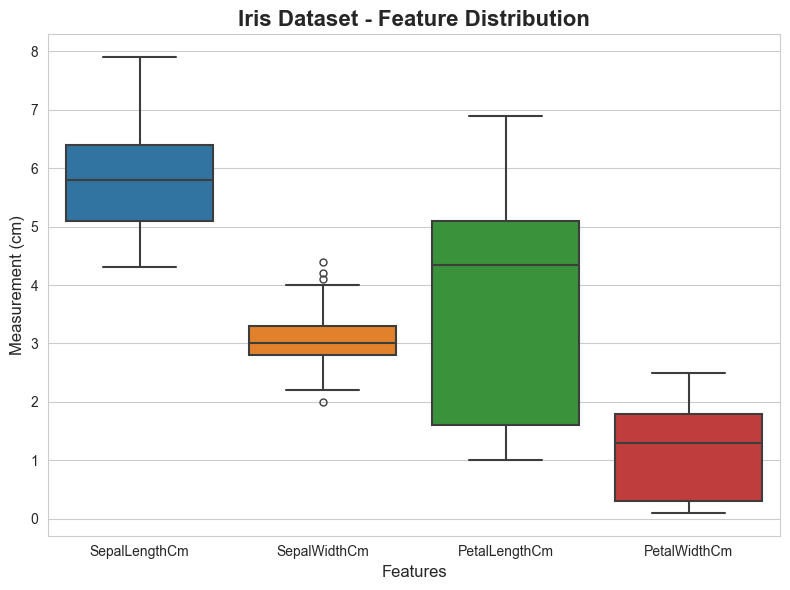

In [6]:
plt.figure(figsize=(8, 6))
features = iris.drop('Species', axis=1)
sns.boxplot(features, linewidth=1.5, fliersize=5)
plt.title("Iris Dataset - Feature Distribution", fontsize=16, fontweight='bold')
plt.ylabel("Measurement (cm)", fontsize=12)
plt.xlabel("Features", fontsize=12)
plt.tight_layout()
plt.savefig('plots/2_feature_distr.png', dpi=300, bbox_inches='tight')
plt.show()


- This boxplot displays the distribution of features from dataset

1. SepalLengthCm (blue) - Shows sepal length ranges mostly between 5-6.5 cm, with a median around 5.8 cm. 
2. SepalWidthCm (orange) - Shows sepal width is generally smaller, ranging from about 2.5-3.5 cm with a median around 3 cm. There are several outliers on both the high and low ends.
3. PetalLengthCm (green) - Displays the widest range and variation, from approximately 1-7 cm with a median around 4.3 cm. This highly variable distribution suggests it might be a good feature for distinguishing between iris species.
4. PetalWidthCm (red) - Shows the smallest measurements overall, ranging from about 0.2-2.5 cm with a median around 1.3 cm. This also shows considerable spread.


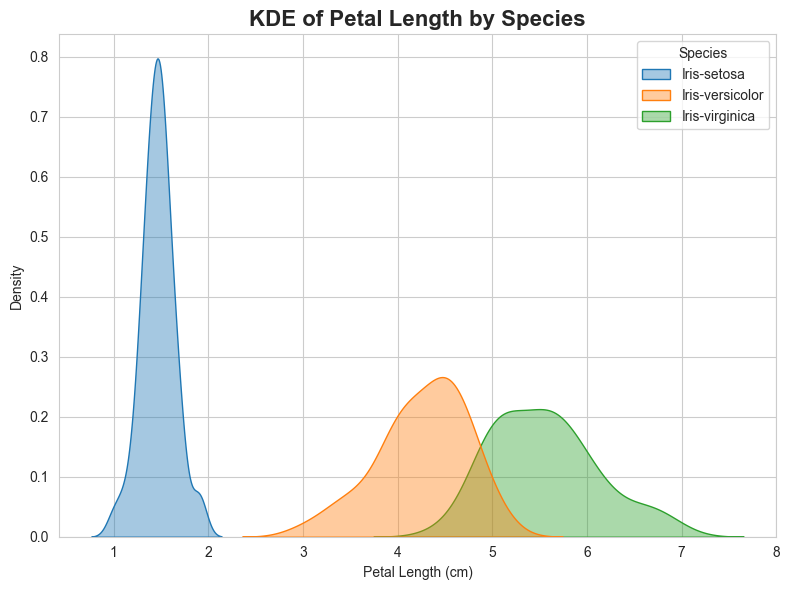

In [7]:
plt.figure(figsize=(8,6))
sns.kdeplot(data=iris, x="PetalLengthCm", hue="Species", fill=True, alpha=0.4)
plt.title("KDE of Petal Length by Species", fontsize=16, fontweight='bold')
plt.xlabel("Petal Length (cm)")
plt.ylabel("Density")
plt.tight_layout()
plt.savefig('plots/3_kde_density.png', dpi=300, bbox_inches='tight')
plt.show()

- KDE plot shows density of PetalLengthCm feature for all 3 species

1. Iris-setosa - somewhere around a length of 1.5 cm, we have the highest density of 0.8. This means that most of the Iris-setosa species have a petal length of around 1.5 cm. Also, we can see that this species is clearly separated from other species, which could possibly mean that a future model will predict Iris-setosa the best. 
2. Iris-versicolor - medium size around 3.5-5 cm spreads wider with lower density and overlaps Iris-virginica
3. Iris-virginica - has the largest petals, ranging from approximately 4.5-7 cm, with the widest distribution and lowest peak density of around 0.21. This species partially overlaps with Iris-versicolor in the 4.5-5.5 cm range, which may cause classification challenges for the model in this overlapping region.


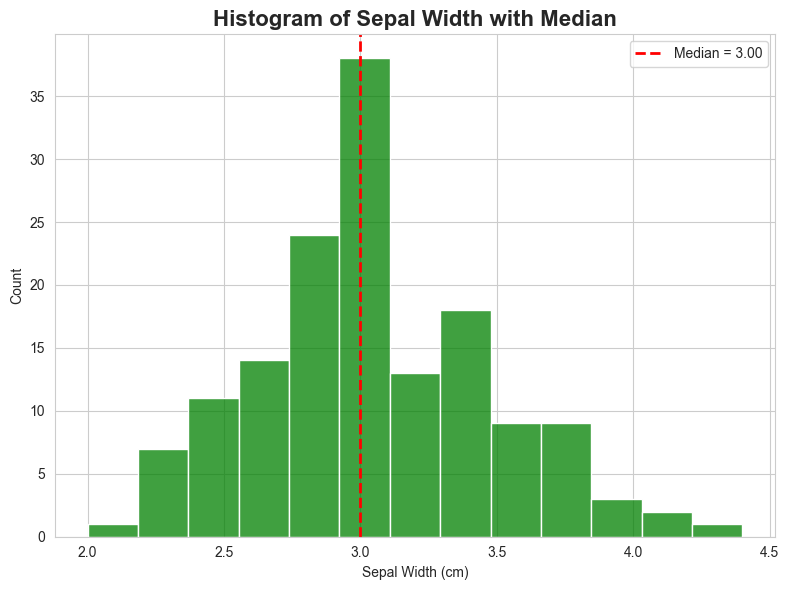

In [8]:
plt.figure(figsize=(8,6))
sns.histplot(data=iris, x='SepalWidthCm', color='green')

median = iris['SepalWidthCm'].median()
plt.axvline(median, color='red', linestyle='--', linewidth=2, label=f"Median = {median:.2f}")

plt.title("Histogram of Sepal Width with Median", fontsize=16, fontweight='bold')
plt.xlabel("Sepal Width (cm)")
plt.ylabel("Count")
plt.legend()

plt.tight_layout()
plt.savefig('plots/4_sw_distr.png', dpi=300, bbox_inches='tight')
plt.show()

- The histogram shows the distribution of the SepalWidthCm feature. 
- Most flowers have a sepal width around 3.0 cm, which corresponds to the median of the dataset (indicated by the red dashed line). 
- The distribution is roughly symmetric, with most values concentrated between 2.5 cm and 3.5 cm, and only a few extreme values beyond this range.

### 4.2 Bivariate analysis
Bivariate analysis is the examination of two variables at the same time to understand the relationship or association between them.

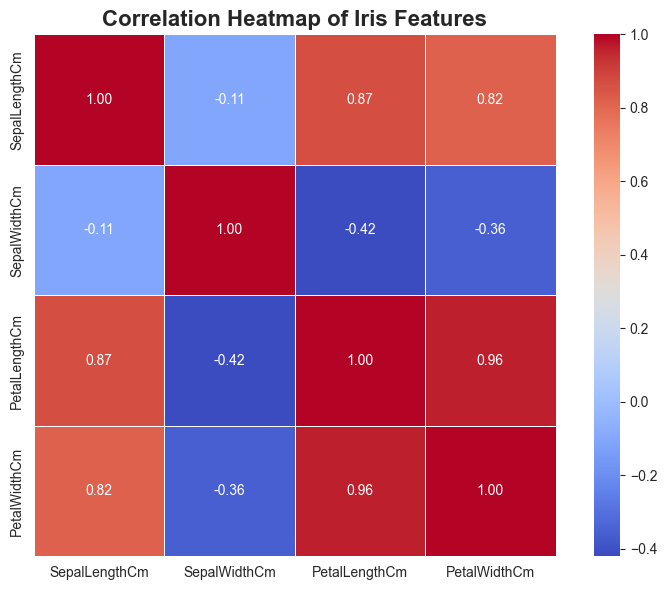

In [9]:
numeric_features = iris.select_dtypes(include='number')
corr_map = numeric_features.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_map, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, square=True)

plt.title("Correlation Heatmap of Iris Features", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('plots/5_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

- Correlation measures the relationship between two features:
1. +1.0 = perfect positive correlation (when one increases, the other increases too)
2. 0.0 = no relationship
3. -1.0 = perfect negative correlation (when one increases, the other decreases)

- In this correlation heatmap we can some strong correlation 0.96 between petal length and petal width (longer petal = wider petal)
- Petal length and Sepal length also strong corelation 0.87 (longer petal = longer sepal)
- We can see negative correlation between petal length and sepal width -0.42 (wider sepal = smaller petal)
- And weakest correlation is between sepal width and sepal length -0.11     
<br>

- CONSLUSION:
- PetalLength and PetalWidth are highly correlated (0.96) → they carry similar information
- Perhaps one of them might be sufficient for classification
- Feature selection - we could possibly remove one of the highly correlated features
- SepalWidth has weak correlation with others → provides unique information

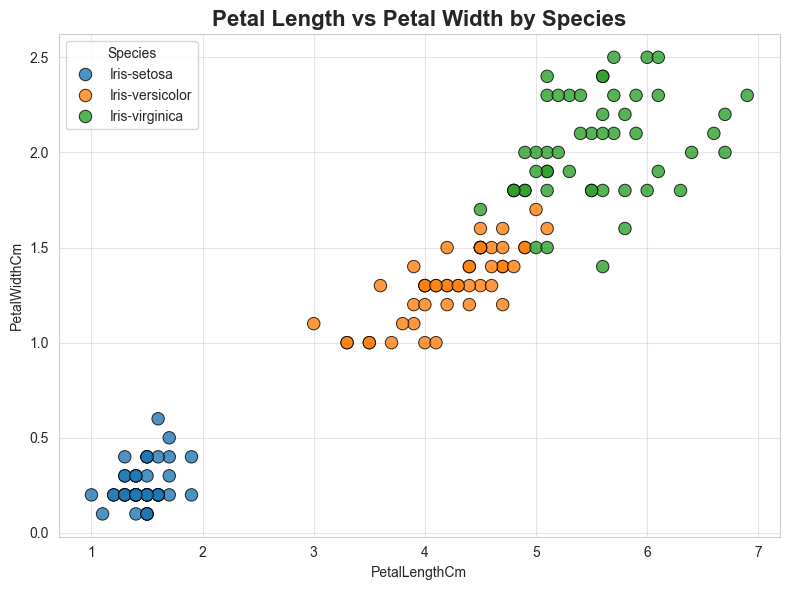

In [10]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=iris, x="PetalLengthCm", y="PetalWidthCm", hue="Species", s=80, alpha=0.8, edgecolor='black')

plt.title("Petal Length vs Petal Width by Species", fontsize=16, fontweight='bold')
plt.grid(alpha=0.5)
plt.tight_layout()
plt.savefig('plots/6_bi_plpw.png', dpi=300, bbox_inches='tight')
plt.show()

- Here we see confirmed that as petal length increases, petal width increases as well (strong correlation)
- We also confirm that iris-setosa linearly separable

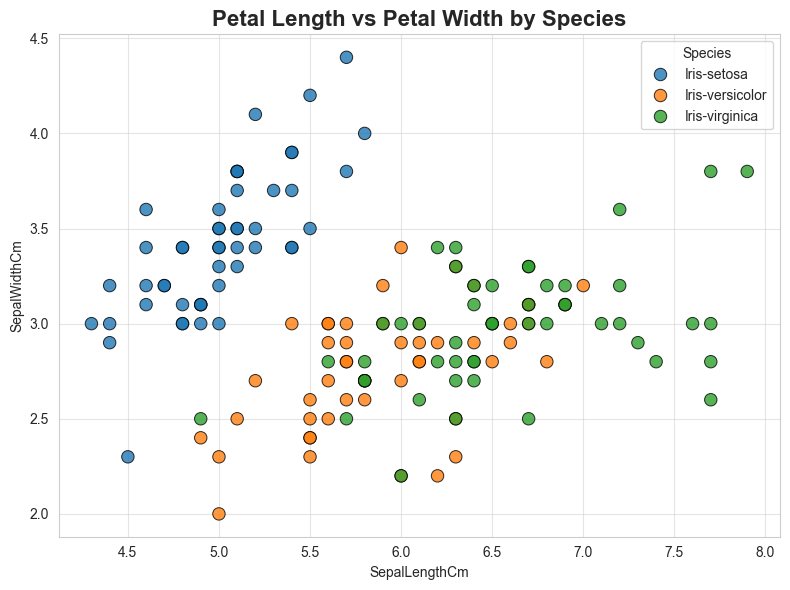

In [11]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=iris, x="SepalLengthCm", y="SepalWidthCm", hue="Species", s=80, alpha=0.8, edgecolor='black')

plt.title("Petal Length vs Petal Width by Species", fontsize=16, fontweight='bold')
plt.grid(alpha=0.5)
plt.tight_layout()
plt.savefig('plots/7_bi_slsw.png', dpi=300, bbox_inches='tight')
plt.show()

- We see weaker separation between sepal length and sepal width, also we see weak correlation
- Reveals clusters but with some overlap

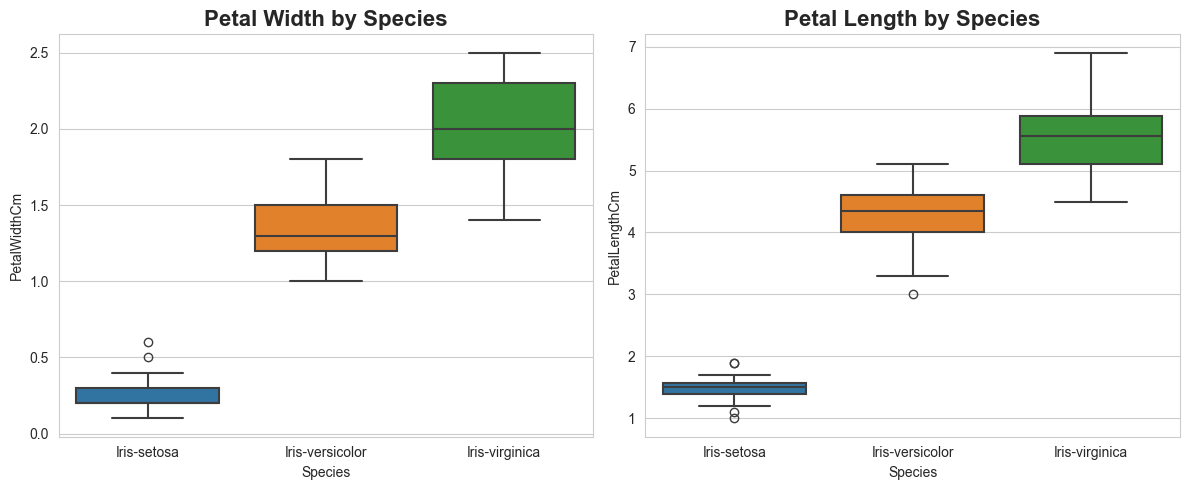

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(data=iris, x="Species", y="PetalWidthCm", hue="Species", linewidth=1.5, ax=axes[0])
axes[0].set_title("Petal Width by Species", fontsize=16, fontweight='bold')

sns.boxplot(data=iris, x="Species", y="PetalLengthCm", hue="Species", linewidth=1.5, ax=axes[1])
axes[1].set_title("Petal Length by Species", fontsize=16, fontweight='bold')

plt.tight_layout()
plt.savefig('plots/8_distr_pwpl_species.png', dpi=300, bbox_inches='tight')
plt.show()


- This boxplots displays the distribution of petal width (left graph) and petal length (right graph) across the three Iris species
- We see completely distinct petal lengths and widths between species
- Clear difference in medians
- Setosa has the smallest variation (very consistent petal size and petal width) and some outliers

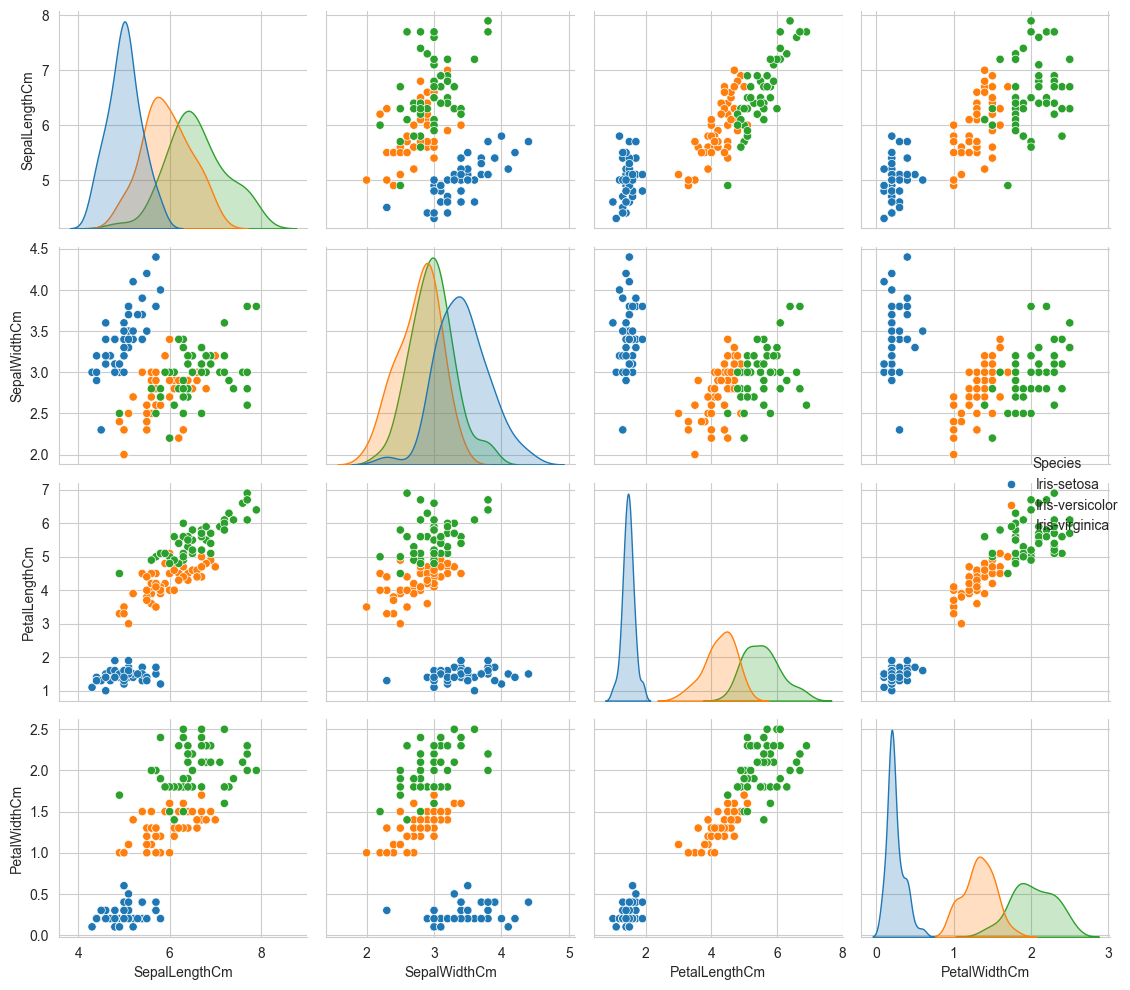

In [13]:
sns.pairplot(iris, hue="Species")
plt.tight_layout()
plt.savefig('plots/9_pairplot.png', dpi=300, bbox_inches='tight')
plt.show()

- What you’re looking at is a pair plot. This visualization is very useful to see feature relationships, correlations, and class separability in the Iris dataset.  
<br>
- What we can see here:
1. Iris-setosa (blue) is clearly separable from the other two species in petal length and petal width.
2. Iris-versicolor and Iris-virginica overlap somewhat in sepal dimensions, but are more separable using petal dimensions.
3. Petal length and petal width are highly correlated for all species.

### =============================================
### 5. Insights
### =============================================



- **Patterns Identified**:
  - **Iris-setosa** is **completely separable** from the other two species using **petal length** and **petal width**. Its petal measurements are consistently smaller (petal length < 2.5 cm, petal width < 0.7 cm).
  - **Iris-versicolor** and **Iris-virginica** overlap significantly in **sepal length** and **sepal width**, making these features less discriminative between them.
  - **Petal length and petal width** show a **strong positive correlation** (near-linear) across all species — the strongest relationship in the dataset.
  - **Sepal width** has the **least variation across species** and shows minimal correlation with other features, making it the **least informative** for classification.
  - **Petal length** varies the **most across species**, followed by **petal width**. These two features dominate class separation.

- **Surprising Trends**:
  - Despite sepal measurements being commonly used in botany, **petal features are far more predictive** of species in this dataset.
  - A small cluster of **Iris-virginica** points have unusually high sepal width (> 3.5 cm), forming a distinct subgroup — possibly a measurement outlier or biological variation.
  - The **setosa class forms a tight, compact cluster** in all feature pairs, indicating low intra-class variation, while **versicolor** and **virginica** show more spread.